In [44]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon
from pathlib import Path

In [62]:
#get the 2010 census tracts in NYC
#https://s3.amazonaws.com/tripdata/index.html for the trip data
cenTract = gpd.read_file('../Data/NYC/CensusTracts/NYC_Census_Tracts_for_2010_US_Census/NYC_Census_Tracts_for_2010_US_Census.shp')

In [71]:
from cenpy import products
#https://api.census.gov/data/2019/acs/acs5/variables.html variables for census
NYC = products.ACS(2019).from_place('New York City, NY', level='tract',
                                   variables = ['B08006_001E', 'B08006_002E', 'B08006_003E',
                                               'B08006_004E', 'B08006_008E', 'B08006_009E'])

/Users/katelyncmorrison/opt/anaconda3/envs/CURF/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



Matched: New York City, NY to New York city within layer Incorporated Places


In [72]:
NYC.head(1)

,GEOID,geometry,B08006_001E,B08006_002E,B08006_003E,B08006_004E,B08006_008E,B08006_009E,state,county,tract
0,36085017009,"POLYGON ((-8259606.540 4945204.550, -8259551.5...",1915.0,1532.0,1373.0,159.0,233.0,138.0,36,085,017009


In [55]:
cenTract.head(1)

,OBJECTID,CTLabel,BoroCode,BoroName,CT2010,BoroCT2010,CDEligibil,NTACode,NTAName,PUMA,Shape__Are,Shape__Len,geometry
0,1,9,5,Staten Island,000900,5000900,E,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64344, -74.07914 40.643..."


In [56]:
# NYC = NYC.drop_duplicates('tract')
NYC = NYC.reset_index()
# NYC = NYC.drop(columns = ['geometry', 'GEOID', 'county', 'index'])
NYC.head(1)

,index,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B08006_001E,B08006_002E,B08006_003E,B08006_004E,B08006_008E,B08006_009E,state,county,tract
0,0,36085017009,"POLYGON ((-8259606.540 4945204.550, -8259551.5...",4485.0,4198.0,0.0,0.0,188.0,0.0,0.0,1915.0,1532.0,1373.0,159.0,233.0,138.0,36,085,017009


In [73]:
len(NYC)

2061

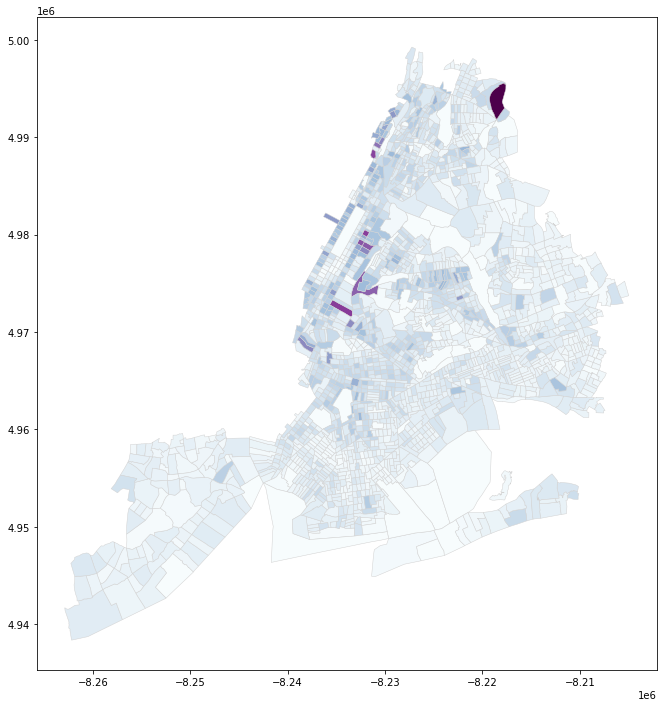

In [74]:
ax = NYC.plot(column = "B08006_008E", cmap="BuPu",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
# cur_nyc_df.plot(ax=ax, color="Red", markersize=1)

In [ ]:
NYC = NYC.drop_duplicates('tract')

In [68]:
NYC = NYC.drop_duplicates('tract')
NYC = NYC.reset_index()
# NYC = NYC.drop(columns = ['geometry', 'GEOID', 'county', 'index'])
NYC.head(1)

,level_0,index,GEOID,geometry,B01003_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B08006_001E,B08006_002E,B08006_003E,B08006_004E,B08006_008E,B08006_009E,state,county,tract
0,0,0,36085017009,"POLYGON ((-8259606.540 4945204.550, -8259551.5...",4485.0,4198.0,0.0,0.0,188.0,0.0,0.0,1915.0,1532.0,1373.0,159.0,233.0,138.0,36,085,017009


In [69]:
len(NYC)

1299

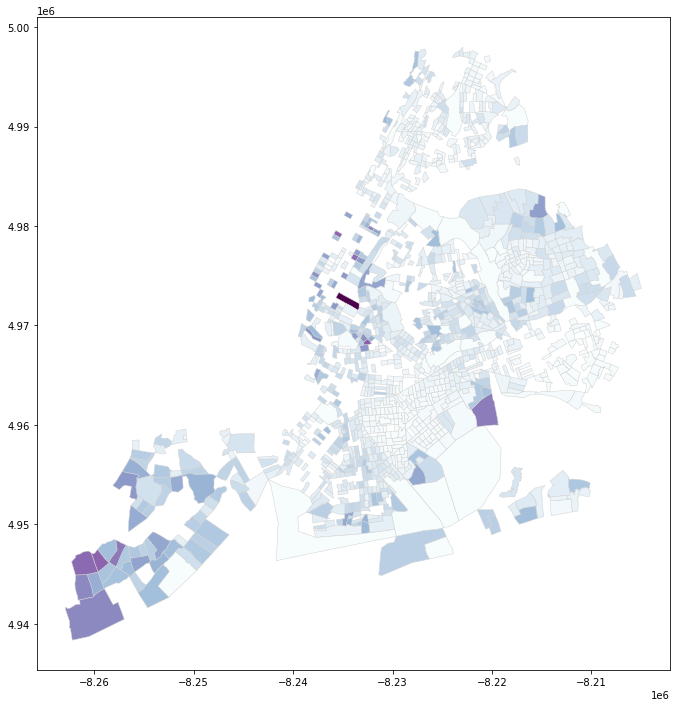

In [70]:
ax = NYC.plot(column = "B02001_002E", cmap="BuPu",figsize = (15, 12), edgecolor = "lightgrey", linewidth = 0.5)
# cur_nyc_df.plot(ax=ax, color="Red", markersize=1)

In [63]:
cenTract = cenTract.drop_duplicates()
cenTract = cenTract.reset_index()
cenTract = cenTract.drop(columns=['OBJECTID','CTLabel', 'BoroCode', 'BoroName', 'CDEligibil', 'NTACode', 'NTAName',
                        'PUMA', 'index', 'BoroCT2010', 'geometry'])
cenTract = cenTract.rename(columns={'CT2010':'tract'})
cenTract.head(1)

,tract,Shape__Are,Shape__Len
0,000900,2.497010e+06,7729.016794


In [37]:
NYC = NYC.drop_duplicates('tract')
nyc_prep = NYC.set_index('tract')

In [38]:
nyc_prep = nyc_prep.T

In [39]:
nyc_prep.columns

Index(['017009', '017012', '017011', '027302', '021300', '012200', '014700',
       '002001', '007400', '001800',
       ...
       '126500', '134100', '108500', '109900', '128300', '136700', '050800',
       '051000', '138502', '157101'],
      dtype='object', name='tract', length=1299)

In [40]:
nyc_prep.to_dict()

{'017009': {'B01003_001E': 4485.0,
  'B02001_002E': 4198.0,
  'B02001_003E': 0.0,
  'B02001_004E': 0.0,
  'B02001_005E': 188.0,
  'B02001_006E': 0.0,
  'B02001_007E': 0.0,
  'B08006_001E': 1915.0,
  'B08006_002E': 1532.0,
  'B08006_003E': 1373.0,
  'B08006_004E': 159.0,
  'B08006_008E': 233.0,
  'B08006_009E': 138.0,
  'state': '36'},
 '017012': {'B01003_001E': 4321.0,
  'B02001_002E': 3882.0,
  'B02001_003E': 48.0,
  'B02001_004E': 0.0,
  'B02001_005E': 235.0,
  'B02001_006E': 18.0,
  'B02001_007E': 80.0,
  'B08006_001E': 1835.0,
  'B08006_002E': 1397.0,
  'B08006_003E': 1247.0,
  'B08006_004E': 150.0,
  'B08006_008E': 346.0,
  'B08006_009E': 247.0,
  'state': '36'},
 '017011': {'B01003_001E': 4865.0,
  'B02001_002E': 4732.0,
  'B02001_003E': 2.0,
  'B02001_004E': 0.0,
  'B02001_005E': 69.0,
  'B02001_006E': 0.0,
  'B02001_007E': 0.0,
  'B08006_001E': 2238.0,
  'B08006_002E': 1561.0,
  'B08006_003E': 1366.0,
  'B08006_004E': 195.0,
  'B08006_008E': 611.0,
  'B08006_009E': 388.0,
  'st

In [65]:
dup = cenTract.merge(NYC, on='tract')

In [67]:
ax = dup.plot(column = "B02001_002E", cmap="BuPu", edgecolor = "lightgrey", linewidth = 0.5)

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 432x288 with 1 Axes>